In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [53]:
original_data = pd.read_csv('./archive(1)/ventas-por-factura.csv')
## buena practica crear una copia del dataframe a utilizar
data = original_data.copy()

# Limpieza de datos
## 1) Tratamiento general
## 1.1) vistazo de los datos que tenemos

In [54]:
data.head(3)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


**Obsevaciones**
- Existen 2 datos numericos
- Existen 4 datos categoricos
- El valor monto trae un tipo de dato incorrecto (str)
- La mayor cantidad de datos esta en el valor 'ID cliente'
- El valor fecha por ahora no es un tipo de dato trabajable

## 1.2) Valores nulos
- El equipo decidio que estos datos se eliminaran para no afectar una futura exploracion y trabajo de datos


In [56]:
print(f'tamaño del dataset antes de borrar datos nulos {data.shape}')
data.dropna(inplace=True)
print(f'tamaño del dataset despues de borrar datos nulos {data.shape}')

print(f'tamaño del dataset antes de borrar datos repetidos {data.shape}')
data.drop_duplicates(inplace=True)
print(f'tamaño del dataset despues de borrar datos repetidos {data.shape}')

tamaño del dataset antes de borrar datos nulos (25953, 6)
tamaño del dataset despues de borrar datos nulos (22229, 6)
tamaño del dataset antes de borrar datos repetidos (22229, 6)
tamaño del dataset despues de borrar datos repetidos (22221, 6)


## 1.3) Valores repetidos
- El equipo decidio que los datos repetidos pueden afectar una futura exploracion y trabajo de los datos

In [57]:
print(f'Tamaño del dataset antes de borrar los valores repetidos {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del dataset despues de borrar los valores repetidos {data.shape}')

Tamaño del dataset antes de borrar los valores repetidos (22221, 6)
Tamaño del dataset despues de borrar los valores repetidos (22221, 6)


## 1.4) Conversion de datos
- se decidio cambiar el formato de valores tales como: **'Monto'** y **'Fecha de factura'** para facilitar la manipulacion y trabajo con estos valores

### tratamiento de monto

In [58]:
## 1) creare una lista que guarde los nuevos datos numericos cambiado su formato de string cambiando ',' ṕor '.'
str_monto = [i.replace(',','.') for i in data['Monto']]
## veo el valor que tienen los datos de esta lista
print(type(str_monto[10]))

## 2) creare una lista que guardara los datos en formato float
float_monto = [float(i) for i in str_monto]
## veo el valor que tienen los datos de esta lista
print(type(float_monto[10]))

## 3) Agragare esta lista al set de datos
data['Monto_float'] = float_monto
## veo que se halla agregado la nueva columna y que tengqa el formato deseado
print('-_-_'*20)
data.info()

<class 'str'>
<class 'float'>
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22221 entries, 0 to 25951
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     22221 non-null  object 
 1   Fecha de factura  22221 non-null  object 
 2   ID Cliente        22221 non-null  float64
 3   País              22221 non-null  object 
 4   Cantidad          22221 non-null  int64  
 5   Monto             22221 non-null  object 
 6   Monto_float       22221 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


### Tratamiento de Fecha de factura

In [59]:
## 1) se creara una funcion que resiva los valores de fecha y los convierta en valores datatime para su manipulacion
str_fecha = data['Fecha de factura']

# funcion que recive una lista en donde el iterardo agarrara el formato de fecha y lo cambiara agragandolo en una 
# lista la cual el es retornada por la funcion
def convertir_fecha(lista):
    
    fecha_convertida = []
    
    for i in lista:
        x = datetime.strptime(i , '%m/%d/%Y %H:%M:%S')
        fecha_convertida.append(x)
        
    return(fecha_convertida)

fecha = convertir_fecha(str_fecha)

print(type(fecha[0]))

# se agragara la lista al dataframe
data['Fecha'] = fecha

<class 'datetime.datetime'>


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22221 entries, 0 to 25951
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   N° de factura     22221 non-null  object        
 1   Fecha de factura  22221 non-null  object        
 2   ID Cliente        22221 non-null  float64       
 3   País              22221 non-null  object        
 4   Cantidad          22221 non-null  int64         
 5   Monto             22221 non-null  object        
 6   Monto_float       22221 non-null  float64       
 7   Fecha             22221 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.5+ MB


In [61]:
data.shape

(22221, 8)

**Observaciones** 
- la cantidad de columnas valores a aunmentado de 6 a 8
- con las nuevas columnas agragadas otras han pasado a ser columnas irrelevantes o que contienen informacion repetida

#### se eliminaran las columnas Monto y Fecha de factura

In [62]:
## eliminacion de la columna monto
print(f'Antes de borrar la columna monto {data.shape}')
data.drop('Monto', axis=1, inplace=True)
print(f'Despues de borrar la columna monto {data.shape}')


Antes de borrar la columna monto (22221, 8)
Despues de borrar la columna monto (22221, 7)


In [63]:
## Eliminacion de la columna Fecha de factura
print(f'Antes de borrar la columna Fecha de factura {data.shape}')
data.drop('Fecha de factura', axis=1, inplace=True)
print(f'Despues de borrar la columna Fecha de factura {data.shape}')

Antes de borrar la columna Fecha de factura (22221, 7)
Despues de borrar la columna Fecha de factura (22221, 6)


In [64]:
## obsevo como quedan los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22221 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N° de factura  22221 non-null  object        
 1   ID Cliente     22221 non-null  float64       
 2   País           22221 non-null  object        
 3   Cantidad       22221 non-null  int64         
 4   Monto_float    22221 non-null  float64       
 5   Fecha          22221 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


# 2) Datos numericos

In [65]:
data.describe()

,ID Cliente,Cantidad,Monto_float
count,22221.000000,22221.000000,22221.000000
mean,15238.398317,220.822105,373.523505
std,1732.987098,1169.306198,2016.999501
min,12346.000000,-80995.000000,-168469.600000
25%,13755.000000,30.000000,87.440000
50%,15136.000000,120.000000,240.680000
75%,16746.000000,254.000000,417.620000
max,18287.000000,80995.000000,168469.600000


## 2.1 Distribucion de datos numericos

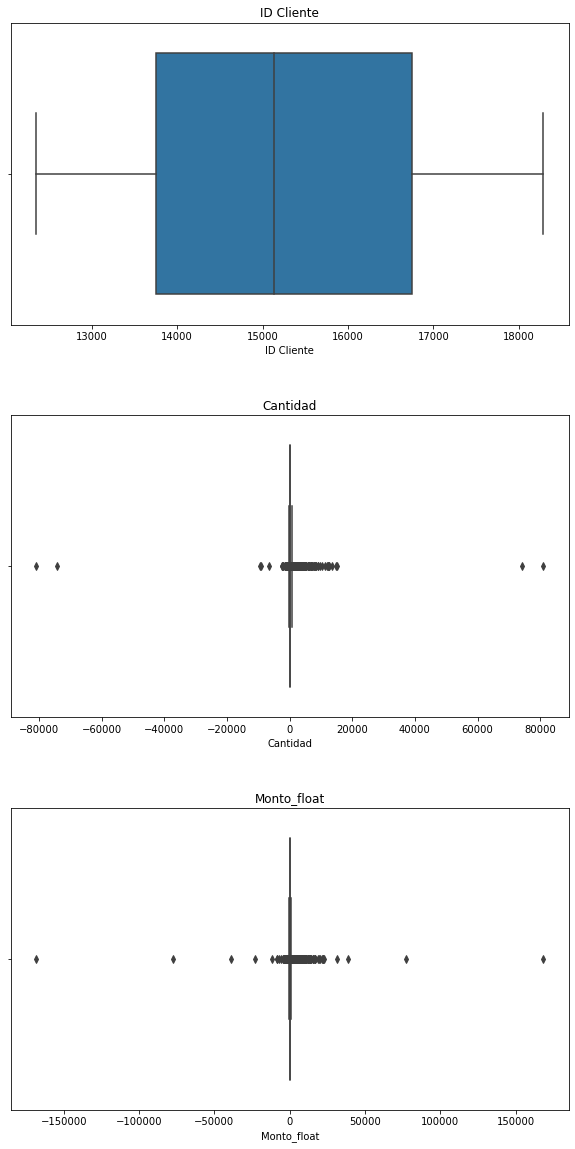

In [66]:

## vere como se comportan los datos en un boxplot
valores_numericos = ['ID Cliente', 'Cantidad', 'Monto_float']

fig, ax = plt.subplots(nrows=len(valores_numericos), ncols=1, figsize = (10,20))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(valores_numericos):
    sns.boxplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(col)

**Observaciones**
- Hay presencia de valores negativso en el monto y la cantidad
## 2.2) Manejo de valores negativos

In [67]:
## se eliminaran los valores negativos
print(f'Cantidad de datos antes de borrar los valores negativos en monto_float: {data.shape}')
data = data[data['Monto_float'] > 0]
print(f'Cantidad de datos despues de borrar los valores negativos en monto_float: {data.shape}')

Cantidad de datos antes de borrar los valores negativos en monto_float: (22221, 6)
Cantidad de datos despues de borrar los valores negativos en monto_float: (18562, 6)


In [68]:
print(f'Cantidad de datos antes de borrar los valores negativos en Cantidad: {data.shape}')
data = data[data['Cantidad'] > 0]
print(f'Cantidad de datos despues de borrar los valores negativos en Cantidad: {data.shape}')

Cantidad de datos antes de borrar los valores negativos en Cantidad: (18562, 6)
Cantidad de datos despues de borrar los valores negativos en Cantidad: (18562, 6)


### Cantidad de datos

In [69]:
data.shape

(18562, 6)

# 3) Datos categoricos
## 3.2) Que datos categoricos tengo 

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18562 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N° de factura  18562 non-null  object        
 1   ID Cliente     18562 non-null  float64       
 2   País           18562 non-null  object        
 3   Cantidad       18562 non-null  int64         
 4   Monto_float    18562 non-null  float64       
 5   Fecha          18562 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1015.1+ KB


In [71]:
category_columns = ['N° de factura','Fecha','País']
## ver los subniveles que tienen las variables categoricas
for col in category_columns:
    print(f'columna {col}: tiene {data[col].nunique()} subniveles')

columna N° de factura: tiene 18532 subniveles
columna Fecha: tiene 17282 subniveles
columna País: tiene 37 subniveles


<AxesSubplot:xlabel='País', ylabel='count'>

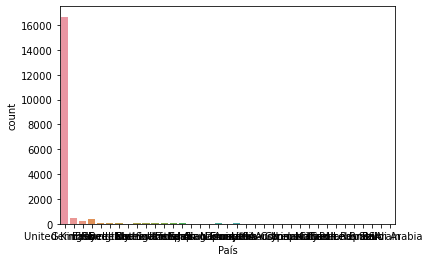

In [72]:
sns.countplot(data=data,x='País')

In [73]:
## se veran que diferentes paises existen
set_paises = set(data['País'])
print(set_paises)
print(len(set_paises))

{'United Kingdom', 'Iceland', 'Greece', 'Israel', 'Canada', 'Unspecified', 'Austria', 'Channel Islands', 'Belgium', 'Poland', 'RSA', 'Portugal', 'Saudi Arabia', 'Czech Republic', 'Germany', 'Sweden', 'Norway', 'France', 'EIRE', 'Singapore', 'Spain', 'Cyprus', 'Japan', 'Finland', 'Netherlands', 'United Arab Emirates', 'Australia', 'Malta', 'Lithuania', 'European Community', 'Italy', 'Denmark', 'Lebanon', 'Brazil', 'Bahrain', 'USA', 'Switzerland'}
37


**Observaciones**
- No se observan errores de escritura que en los datos categoricos
- los datos categoricos tiene demasiados subniveles, los cules interferirar con la visualizacion de estos
- se obta por agrupar las fechas en meses / dias / años
- se decide agrupar los paises por continentes
- la columna facutura la dejaremos en remojo hasta decidir que hacer con ellas

In [74]:
## se veran que diferentes paises existen
set_paises = set(data['País'])
print(set_paises)
print(len(set_paises))

{'United Kingdom', 'Iceland', 'Greece', 'Israel', 'Canada', 'Unspecified', 'Austria', 'Channel Islands', 'Belgium', 'Poland', 'RSA', 'Portugal', 'Saudi Arabia', 'Czech Republic', 'Germany', 'Sweden', 'Norway', 'France', 'EIRE', 'Singapore', 'Spain', 'Cyprus', 'Japan', 'Finland', 'Netherlands', 'United Arab Emirates', 'Australia', 'Malta', 'Lithuania', 'European Community', 'Italy', 'Denmark', 'Lebanon', 'Brazil', 'Bahrain', 'USA', 'Switzerland'}
37


## 3.2) Agrupacion de datos categoricos

In [75]:
## agruparemos los paises en continenete para facilitar su visualizacion

# creare una lista con los paises encapsulados por continente
europa = ['United Kingdom','Germany','France','EIRE','Belgium', 'Netherlands', 'Spain', 'Portugal', 'Australia', 'Switzerland', 'Finland', 'Italy', 'Sweden', 'Norway', 'Channel Islands', 'Poland', 'Denmark', 'Austria', 'Cyprus', 'Iceland', 'Malta', 'Greece', 'Lithuania', 'European Community','Czech Republic']
asia = ['Japan','Singapore']
medio_oriente = ['Israel','United Arab Emirates', 'Bahrain', 'Lebanon','Saudi Arabia']
america = ['Canada', 'USA', 'Brazil']
africa = ['RSA']

In [77]:
## creare una lista que almacenara el continente del pais correspondiente
paises = np.array(data.País)
sale_continente = []

# creare un ciclo en el cual diferentes condiciones le asignaran el valor del continente dependiedo del valor que
## tenga el iterador

for i in paises:

    if i in europa:
        sale_continente.append('Europa')
        
    elif i in asia:
        sale_continente.append('Asia')
        
    elif i in america:
        sale_continente.append('America')
        
    elif i in africa:
        sale_continente.append('Africa')
        
    elif i in medio_oriente:
        sale_continente.append('Medio oriente')
    
    else:
        sale_continente.append(np.nan)


In [78]:
## se adjuntara en el dataframe el la nueva listas con paises
data['Continente'] = sale_continente

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18562 entries, 0 to 25951
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N° de factura  18562 non-null  object        
 1   ID Cliente     18562 non-null  float64       
 2   País           18562 non-null  object        
 3   Cantidad       18562 non-null  int64         
 4   Monto_float    18562 non-null  float64       
 5   Fecha          18562 non-null  datetime64[ns]
 6   Continente     18554 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.1+ MB


## 3.3 creacion de la columna mes, dia y año

In [80]:
## columna venta por mes
# tuppla con los diferentes meses
all_months = ("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

# lista contodos los meses en formato numerico
list_months = [i.month for i in data['Fecha']]

## funcion que convierte los numeros en meses
def convertidor_meses(lista):
    
    months = []
    
    for i in lista:
        a = all_months[i-1]
        months.append(a)
        
    return months

months = convertidor_meses(list_months)

data['sale_month'] = months

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18562 entries, 0 to 25951
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N° de factura  18562 non-null  object        
 1   ID Cliente     18562 non-null  float64       
 2   País           18562 non-null  object        
 3   Cantidad       18562 non-null  int64         
 4   Monto_float    18562 non-null  float64       
 5   Fecha          18562 non-null  datetime64[ns]
 6   Continente     18554 non-null  object        
 7   sale_month     18562 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [82]:
## Columna venta por dia 
day_sale = [i.day for i in data['Fecha']]
data['Day_sale'] = day_sale

In [83]:
## columna venta por año 
year_sale = [i.year for i in data['Fecha']]
data['Year_sale'] = year_sale

In [84]:
## columna venta mes_años

year_month_sale = []
for i in data['Fecha']:
    a  = i.strftime('%Y %m')
    year_month_sale.append(a)
data['month_year'] = year_month_sale

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18562 entries, 0 to 25951
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N° de factura  18562 non-null  object        
 1   ID Cliente     18562 non-null  float64       
 2   País           18562 non-null  object        
 3   Cantidad       18562 non-null  int64         
 4   Monto_float    18562 non-null  float64       
 5   Fecha          18562 non-null  datetime64[ns]
 6   Continente     18554 non-null  object        
 7   sale_month     18562 non-null  object        
 8   Day_sale       18562 non-null  int64         
 9   Year_sale      18562 non-null  int64         
 10  month_year     18562 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.7+ MB


## 3.4) creacion de columna dentro de reino unido fuera de reino unido

In [86]:
# creara una funcion que proporcionara una lista con 0 si la venta fue dentro del reino unido
# y 1 si fue fuera de este pais

def in_or_on(lista):
    
    out_kingdom = []

    for i in lista:
        if i == 'United Kingdom':
            a = 0
            out_kingdom.append(a)
        else:
            a = 1
            out_kingdom.append(a)
    return(out_kingdom)

out_kingdom = in_or_on(data.País)

In [87]:
## agrego la nueva lista como columna la dataset
data['Out_kingdom'] = out_kingdom
data.head(3)

,N° de factura,ID Cliente,País,Cantidad,Monto_float,Fecha,Continente,sale_month,Day_sale,Year_sale,month_year,Out_kingdom
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Europa,Marzo,30,2021,2021 03,0
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Europa,Noviembre,11,2021,2021 11,0
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Europa,Abril,6,2021,2021 04,0


## 3.5) creacion de cantidad de pedidos
- se creara una columna que agrupe la cantidad de pedidos en intervalos definidos por el equipo

In [88]:

def segmentacion_cantidad(lista):
    
    segmentacion = []

    for i in lista:

        if i < 100:
            segmentacion.append('x<100')

        elif i > 100 and i < 301:
            segmentacion.append('100<=x<=300')

        elif i > 300 and i < 601:
            segmentacion.append('300<=x<=600')

        elif i > 600 and i < 901:
            segmentacion.append('600<=x<=900')

        elif i > 900 and i < 1001:
            segmentacion.append('900<=x<=1000')

        elif i > 1000 and i < 3001:
            segmentacion.append('1000<=x<=3000')

        else :
            segmentacion.append('X > 3000')

    return(segmentacion)

agrupamiento = segmentacion_cantidad(data['Cantidad'])


In [89]:
# agregare el array con los datos agrupados al dataframe
data['Volumen_venta'] = agrupamiento

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18562 entries, 0 to 25951
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N° de factura  18562 non-null  object        
 1   ID Cliente     18562 non-null  float64       
 2   País           18562 non-null  object        
 3   Cantidad       18562 non-null  int64         
 4   Monto_float    18562 non-null  float64       
 5   Fecha          18562 non-null  datetime64[ns]
 6   Continente     18554 non-null  object        
 7   sale_month     18562 non-null  object        
 8   Day_sale       18562 non-null  int64         
 9   Year_sale      18562 non-null  int64         
 10  month_year     18562 non-null  object        
 11  Out_kingdom    18562 non-null  int64         
 12  Volumen_venta  18562 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 2.0+ MB


## 3.6 Visualizacion de variables categoricas


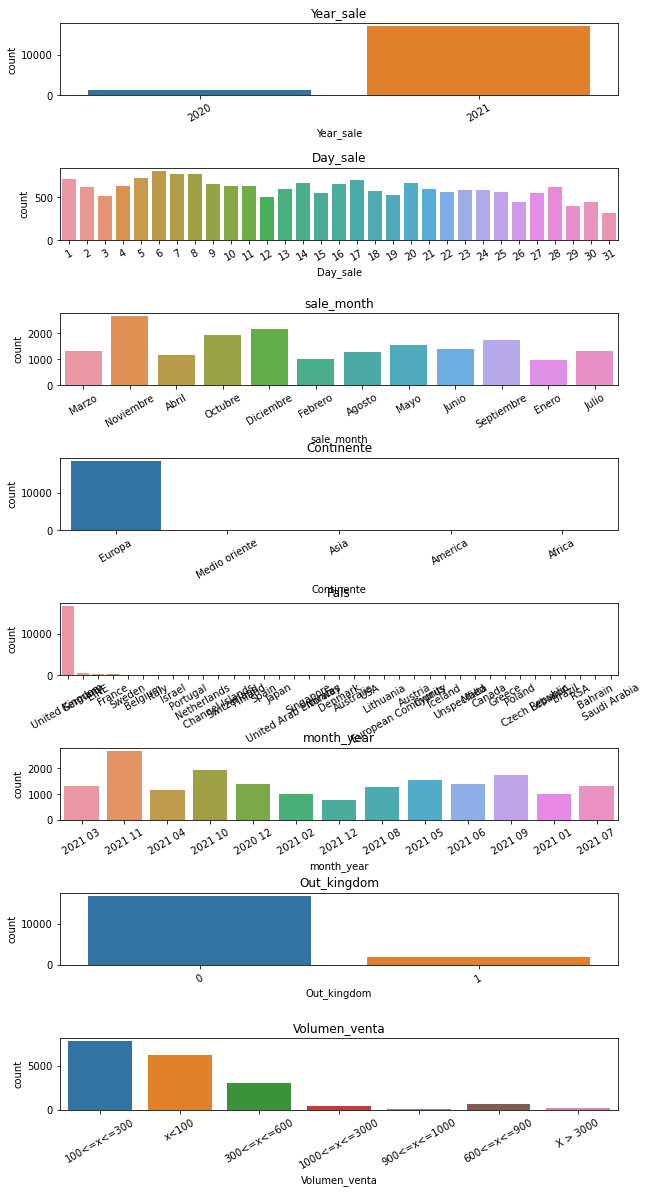

In [91]:
## creare una lista con las veriables categoricas que visualizare
categoricas = ['Year_sale', 'Day_sale', 'sale_month', 'Continente', 'País', 'month_year', 'Out_kingdom', 'Volumen_venta']

## crear el area donde se dispondran las imagenes 
fig, ax = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categoricas):
    sns.countplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18562 entries, 0 to 25951
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N° de factura  18562 non-null  object        
 1   ID Cliente     18562 non-null  float64       
 2   País           18562 non-null  object        
 3   Cantidad       18562 non-null  int64         
 4   Monto_float    18562 non-null  float64       
 5   Fecha          18562 non-null  datetime64[ns]
 6   Continente     18554 non-null  object        
 7   sale_month     18562 non-null  object        
 8   Day_sale       18562 non-null  int64         
 9   Year_sale      18562 non-null  int64         
 10  month_year     18562 non-null  object        
 11  Out_kingdom    18562 non-null  int64         
 12  Volumen_venta  18562 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 2.0+ MB


## Estandarizacion de las etiquetas de las columnas

In [93]:
data.columns

Index(['N° de factura', 'ID Cliente', 'País', 'Cantidad', 'Monto_float',
       'Fecha', 'Continente', 'sale_month', 'Day_sale', 'Year_sale',
       'month_year', 'Out_kingdom', 'Volumen_venta'],
      dtype='object')

In [94]:
data.columns = ['N_factura','ID_Cliente','País','Cantidad','Monto','Fecha','Continente','Mes','Dia','Año','Periodo','Out_kingdom','Volumen_cantidad']

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18562 entries, 0 to 25951
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   N_factura         18562 non-null  object        
 1   ID_Cliente        18562 non-null  float64       
 2   País              18562 non-null  object        
 3   Cantidad          18562 non-null  int64         
 4   Monto             18562 non-null  float64       
 5   Fecha             18562 non-null  datetime64[ns]
 6   Continente        18554 non-null  object        
 7   Mes               18562 non-null  object        
 8   Dia               18562 non-null  int64         
 9   Año               18562 non-null  int64         
 10  Periodo           18562 non-null  object        
 11  Out_kingdom       18562 non-null  int64         
 12  Volumen_cantidad  18562 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 2.0+ MB


In [96]:
data.shape

(18562, 13)

## Se concluye con la limpieza de los datos

### OBSERVACIONES
- 1) el dataframe inicio con: **25953** filas y **6** columnas, despues de la limpieza termino con **18562** filas y **13 columnas**
- 2) los datos numericos tienen valores fuera de lo comun como ventas mayores a **150000** dolares y pedidos por mas de **80000** unidades
- 3) tiene una amplia gama de clientes pero los principales se encuentran en europa siendo su mejor comprador **el reino unido**
- 4) las ventas registradas son de dos años finales de **2020** y todo el **2021**
- 5) los datos numericos presentaban rangos negativos los cuales se eliminaron
- 6) se modificaron columnas tale como **monto**, **fecha** y **paises** ya que era apropiado cambiarles el tipo de datos y eliminarlas por informacion redundante
- 7) por el momento no es posible realizar algo con los datos de las facturas de ventas
- 8) al agrupar los datos por continente **se evidencia que faltan 8 datos los cuales corresponden a los valores nulos de los paises que no fueron identificados no se eliminan ya que estos ayudaran a dar luz en la venta que se hizo fuera de united kingdom**
- 9) Se cambio el nombre de las columnas

In [97]:
data.to_csv('Data_clean')

In [98]:
datos = pd.read_csv('./Data_clean')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18562 entries, 0 to 18561
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        18562 non-null  int64  
 1   N_factura         18562 non-null  int64  
 2   ID_Cliente        18562 non-null  float64
 3   País              18562 non-null  object 
 4   Cantidad          18562 non-null  int64  
 5   Monto             18562 non-null  float64
 6   Fecha             18562 non-null  object 
 7   Continente        18554 non-null  object 
 8   Mes               18562 non-null  object 
 9   Dia               18562 non-null  int64  
 10  Año               18562 non-null  int64  
 11  Periodo           18562 non-null  object 
 12  Out_kingdom       18562 non-null  int64  
 13  Volumen_cantidad  18562 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.0+ MB
